In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os.path
import operator
from datetime import datetime
%matplotlib notebook

In [2]:
pollution = pd.read_csv(os.path.join('data', 'pollution_data.csv'))

In [3]:
proper_dates = pd.to_datetime(pollution.when.values)
index = pd.MultiIndex.from_tuples(list(zip(proper_dates.year, proper_dates.month, proper_dates.day)),
                                 names=['Year', 'Month','Day'])

<IPython.core.display.Javascript object>


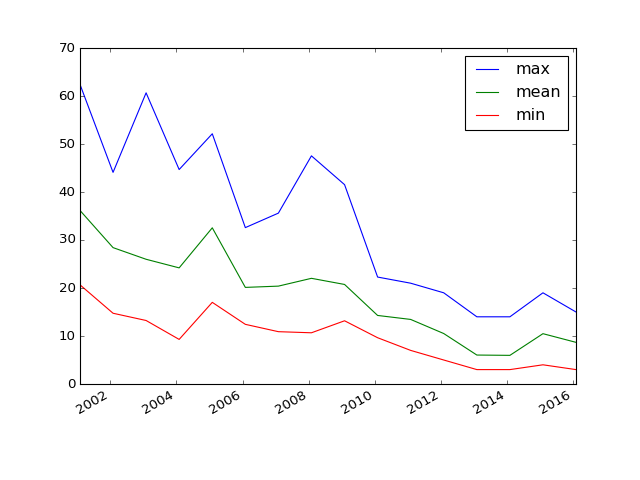

In [4]:
quantitative = pd.DataFrame(
    {'station': pollution.station.values,
     'magnitude': pollution.magnitude.values,
     'measurement': pollution.measurement.values},
    index=index
)


filtered = quantitative[(quantitative.station == 'Cuatro Caminos') & (quantitative.magnitude == 'SO2')]
years = []
mean = []
maximum = []
minimum = []
for year in set(filtered.index.get_level_values('Year')):
    mean.append(filtered.loc[year, 1].measurement.mean())
    maximum.append(filtered.loc[year, 1].measurement.max())
    minimum.append(filtered.loc[year, 1].measurement.min())
    years.append(datetime(year, 1, 31))
    
pd.DataFrame({'mean': mean,
              'max': maximum,
              'min': minimum}, index=years).plot()

## Ejercicio:##
**¿Cuál es la estación con mayor lectura de SO2 en 2013?**

    -Primero filtro por la magnitud SO2 y el año 2013

In [52]:
filt1 = pollution.magnitude == "SO2"
filt2 = pd.Timestamp('2013-1-1') <= pollution.when.pipe(pd.to_datetime)
filt3 = pollution.when.pipe(pd.to_datetime) < pd.Timestamp('2014-1-1')
filtered = pollution[filt1 & filt2 & filt3]
filtered.loc[filtered.measurement.idxmax()]

Unnamed: 0              859212
latitude               40.4084
longitude             -3.64589
magnitude                  SO2
measurement                 39
station              Moratalaz
technique      UV Fluorescence
units                    µg/m3
when                2013-11-27
Name: 859212, dtype: object

# La mayor medición es la de Moratalaz, el 27 de noviembre.

<IPython.core.display.Javascript object>


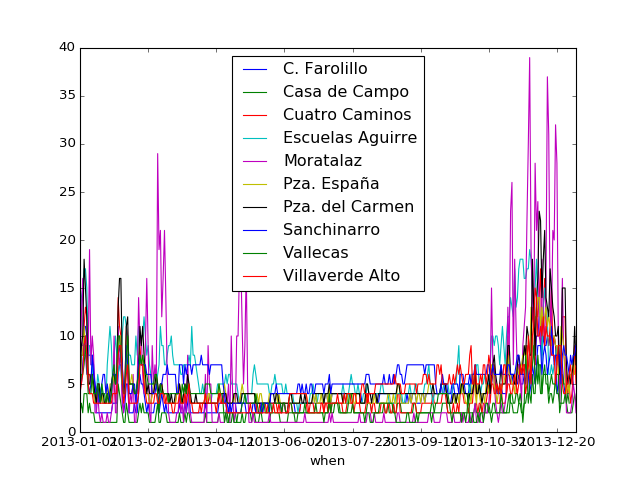

In [60]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for station, group in filtered[['station', 'measurement', 'when']].groupby('station'):
    group.plot(x='when', y='measurement', label=station, ax=ax)

He obtenido que la estación más contaminada en 2013 es la de **Escuelas Aguirre**

El metodo usado es realizar la suma de las mediciones, pero esto prodría falsear el resultado si hubiera más mediciones de esta estación que del resto, por lo que voy a hacer también la media.

In [55]:
so2_2013.groupby(['station','longitude','latitude'])[['measurement']].mean().sort_values(by="measurement", ascending=False)

,,,measurement
station,longitude,latitude,
Escuelas Aguirre,-3.681346,40.421853,6.389205
Sanchinarro,-3.660883,40.494126,5.526027
Pza. del Carmen,-3.705385,40.418713,5.241096
Pza. España,-3.711761,40.424372,4.634615
Moratalaz,-3.645890,40.408357,4.536986
Villaverde Alto,-3.713591,40.346645,4.428177
Cuatro Caminos,-3.707367,40.445826,4.134247
C. Farolillo,-3.731347,40.395270,3.975207
Vallecas,-3.651671,40.388347,3.261111


<IPython.core.display.Javascript object>


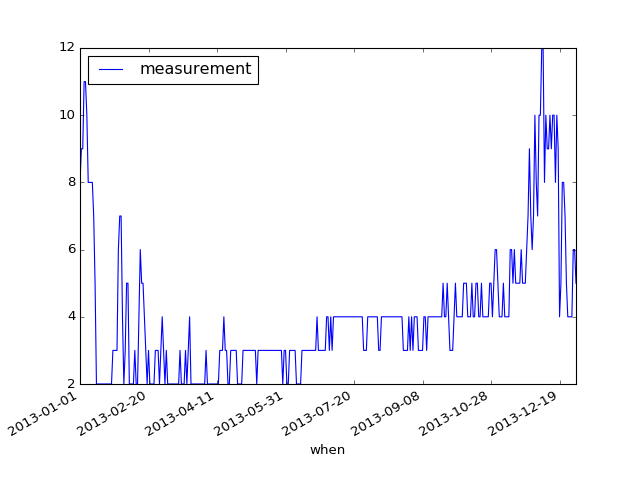

<IPython.core.display.Javascript object>


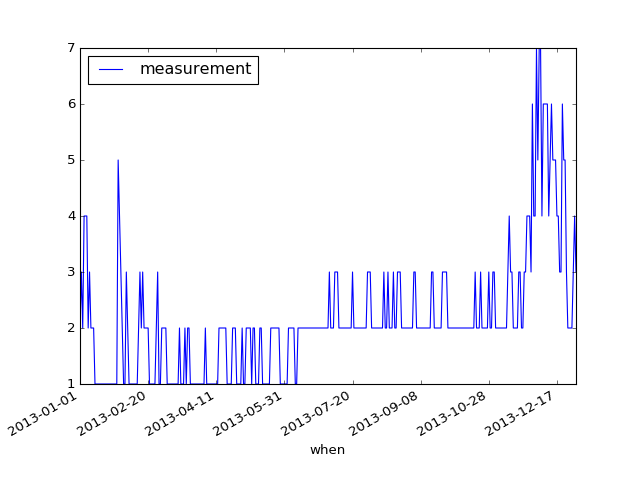

<IPython.core.display.Javascript object>


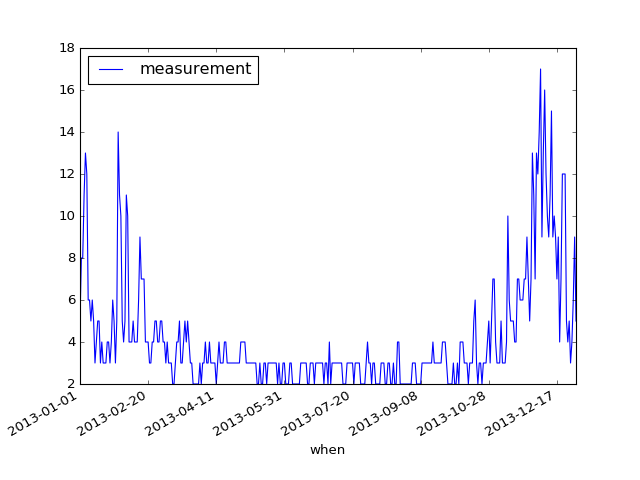

<IPython.core.display.Javascript object>


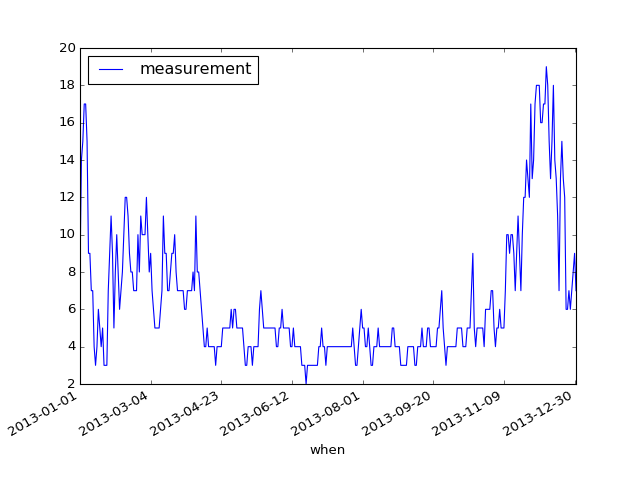

<IPython.core.display.Javascript object>


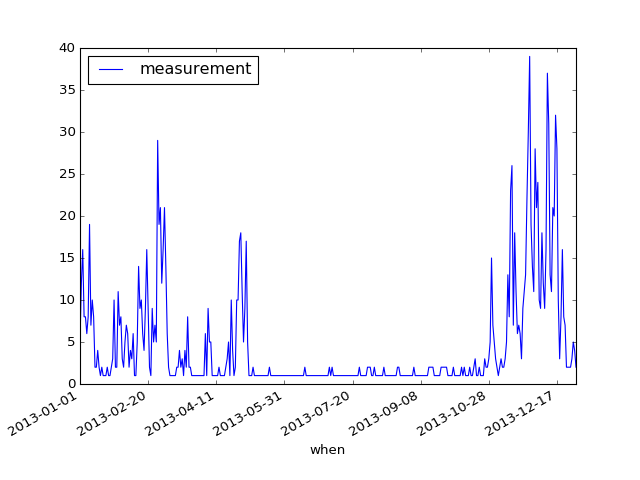

<IPython.core.display.Javascript object>


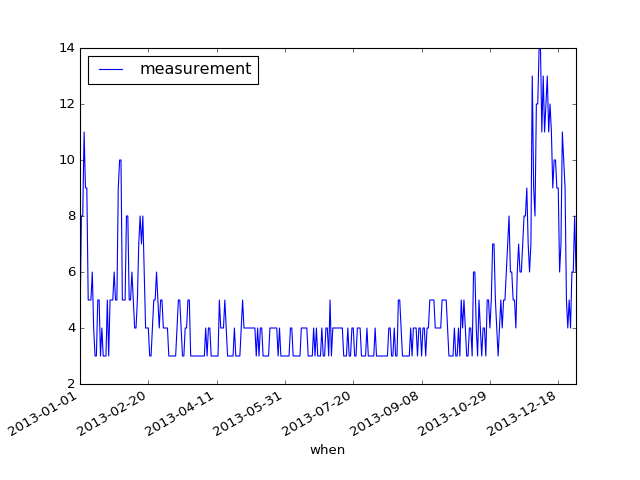

<IPython.core.display.Javascript object>


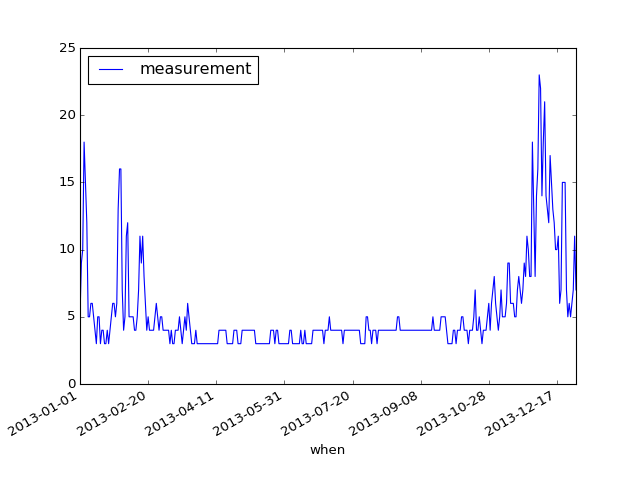

<IPython.core.display.Javascript object>


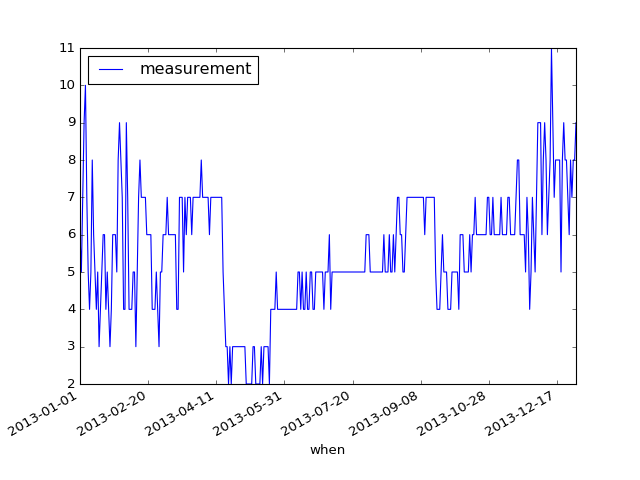

<IPython.core.display.Javascript object>


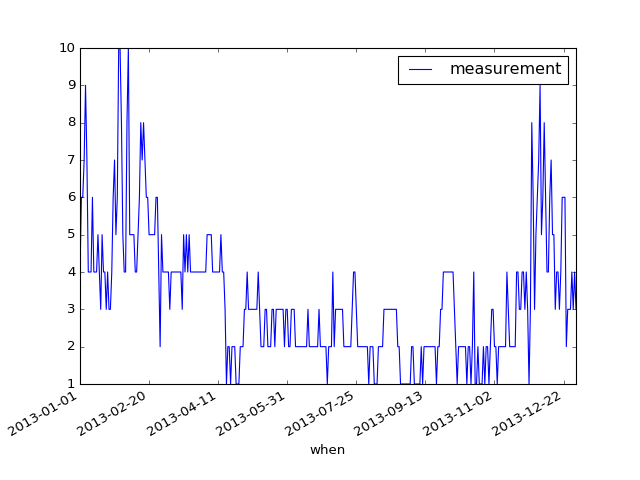

<IPython.core.display.Javascript object>


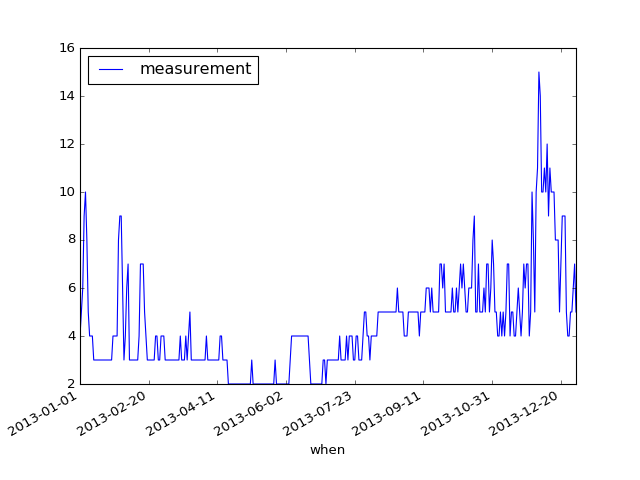

station
C. Farolillo        [Axes(0.125,0.2;0.775x0.7)]
Casa de Campo       [Axes(0.125,0.2;0.775x0.7)]
Cuatro Caminos      [Axes(0.125,0.2;0.775x0.7)]
Escuelas Aguirre    [Axes(0.125,0.2;0.775x0.7)]
Moratalaz           [Axes(0.125,0.2;0.775x0.7)]
Pza. España         [Axes(0.125,0.2;0.775x0.7)]
Pza. del Carmen     [Axes(0.125,0.2;0.775x0.7)]
Sanchinarro         [Axes(0.125,0.2;0.775x0.7)]
Vallecas            [Axes(0.125,0.2;0.775x0.7)]
Villaverde Alto     [Axes(0.125,0.2;0.775x0.7)]
dtype: object

In [60]:
so2_2013.groupby('station').plot(x='when', y='measurement', subplots=True)

### ¿Cómo pintar las series en un solo gráfico?

**Ahora toca ver cúal es la mayor medición de NO en 2015**

In [67]:
no_2015 = pollution[(pollution.magnitude == "NO") & (pollution.when.str.startswith("2015"))].sort_values(by="measurement", ascending=False).head()
no_2015.head()

,Unnamed: 0,latitude,longitude,magnitude,measurement,station,technique,units,when
936685,936685,40.346645,-3.713591,NO,337.0,Villaverde Alto,Chemoluminiscence,µg/m3,2015-12-02
952911,952911,40.477725,-3.712064,NO,327.0,Barrio del Pilar,Chemoluminiscence,µg/m3,2015-01-02
936687,936687,40.346645,-3.713591,NO,323.0,Villaverde Alto,Chemoluminiscence,µg/m3,2015-12-04
936706,936706,40.346645,-3.713591,NO,315.0,Villaverde Alto,Chemoluminiscence,µg/m3,2015-12-23
952918,952918,40.477725,-3.712064,NO,310.0,Barrio del Pilar,Chemoluminiscence,µg/m3,2015-01-09


La mayor lectura de NO en 2015 es 337 en **Villaverde Alto** el 2 de Diciembre

Otra manera sería indexar por la medición y obtener el máximo indice

In [68]:
no_2015.loc[no_2015['measurement'].idxmax()]

Unnamed: 0                936685
latitude                 40.3466
longitude               -3.71359
magnitude                     NO
measurement                  337
station          Villaverde Alto
technique      Chemoluminiscence
units                      µg/m3
when                  2015-12-02
Name: 936685, dtype: object